Object detection

In [1]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Tensorflow Version

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
#Import Libraries file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import cv2     # We will be reading images using OpenCV
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model

In [14]:
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -qq Cython contextlib2 pillow lxml matplotlib pycocotools

In [2]:
#Project Path

project_path = ('/content/drive/My Drive/Kaggle/Object/')

import os
print(os.listdir("/content/drive/My Drive/Kaggle/Object/"))

['Object Detection.ipynb', 'object.zip', 'train', 'test']


Unzip file

In [ ]:
train_images = []       
train_labels = []
shape = (200,200)  
train_path = '/content/drive/My Drive/Kaggle/Object/train'

for filename in os.listdir('/content/drive/My Drive/Kaggle/Object/train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [ ]:

test_images = []
test_labels = []
shape = (200,200)
test_path = '/content/drive/My Drive/Kaggle/Object/test'

for filename in os.listdir('/content/drive/My Drive/Kaggle/Object/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

Visualizing Training Data

[1 0 0 0]


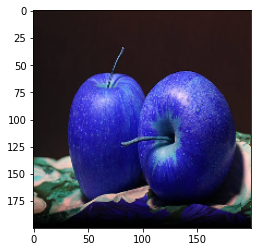

In [ ]:
print(train_labels[0])

plt.imshow(train_images[0])

Create a Model

In [ ]:
#Create a sequantial model

from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
#
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [ ]:
  model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten_1 (Flatten)          (None, 63480)            

Training a Model

In [ ]:
# Training the model
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 26s 6s/step - loss: 38.8891 - acc: 0.2458 - val_loss: 53.3966 - val_acc: 0.2833
Epoch 2/50
4/4 [==============================] - 23s 6s/step - loss: 33.5951 - acc: 0.3087 - val_loss: 4.7393 - val_acc: 0.3333
Epoch 3/50
4/4 [==============================] - 24s 6s/step - loss: 3.3067 - acc: 0.4427 - val_loss: 1.9105 - val_acc: 0.5000
Epoch 4/50
4/4 [==============================] - 23s 6s/step - loss: 1.4878 - acc: 0.4413 - val_loss: 1.2498 - val_acc: 0.5000
Epoch 5/50
4/4 [==============================] - 23s 6s/step - loss: 0.9712 - acc: 0.5633 - val_loss: 0.8837 - val_acc: 0.5167
Epoch 6/50
4/4 [==============================] - 24s 6s/step - loss: 0.8143 - acc: 0.5529 - val_loss: 0.9493 - val_acc: 0.8000
Epoch 7/50
4/4 [==============================] - 23s 6s/step - loss: 0.6809 - acc: 0.7916 - val_loss: 0.7001 - val_acc: 0.8000
Epoch 8/50
4/4 [==============================] - 23s 6s/step - loss: 0.3928 - acc: 0.8698 - val_loss

Visualize Model Accuracy

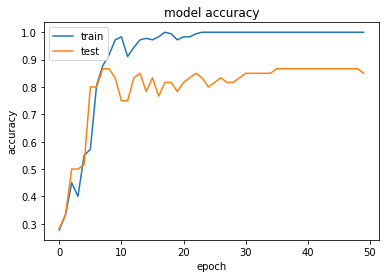

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Check Model Error

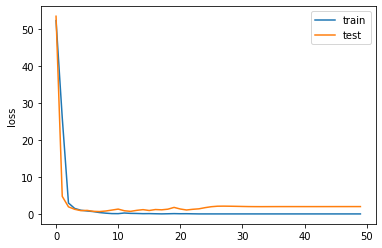

In [ ]:
#History error

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Model Predection

In [ ]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 [==============================] - 2s 746ms/step - loss: 1.9815 - acc: 0.8500
[1.9815257787704468, 0.8500000238418579]
